In [2]:
# Import all required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
plt.style.use(["science", "ieee"])
from gic.model.oml import OceanModel
from gic.model.cables import Cable, TheoriticalSolver
from gic.model.utils import RecursiveNamespace, frexp102str
from gic.validation.simulate_synB_synT import SytheticCableAnalysis

from scipy.stats import pearsonr
%matplotlib inline

In [3]:
# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],
            "Phim": [ 10, 20, 30, 40, 50, 60 ],
            "T_hours": 72
        },
        "tapering": 0.1
    },
    "cable": {
        "cable_sections": [
            {
                "sec_id": None,
                "len_km": 1000,
                "elec_params": {
                    "earth_model": "FT1",
                    "ocean_depth": 0,
                    "ocean_resistivity": 0.3
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
resp = []
for d in [10, 100, 1000, 10000]:
    control.cable.cable_sections[0].elec_params.ocean_depth = d
    sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
    sca.run()
    resp.append(sca.cable.cable_sections[0].cs_oml)

2022-07-29 09:41:35.234 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-07-29 09:41:35.235 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-07-29 09:41:35.312 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:41:35.315 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B FT1->OM(FT1)
2022-07-29 09:41:35.753 | INFO     | gic.validation.simulate_synB_synT:check_analytical_numerical:224 - Corr(Eanl,Enum): 0.9999999961
2022-07-29 09:41:44.470 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-07-29 09:41:44.471 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-07-29 09:41:44.528 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:41:44.534 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B FT1->OM(FT1)
2022

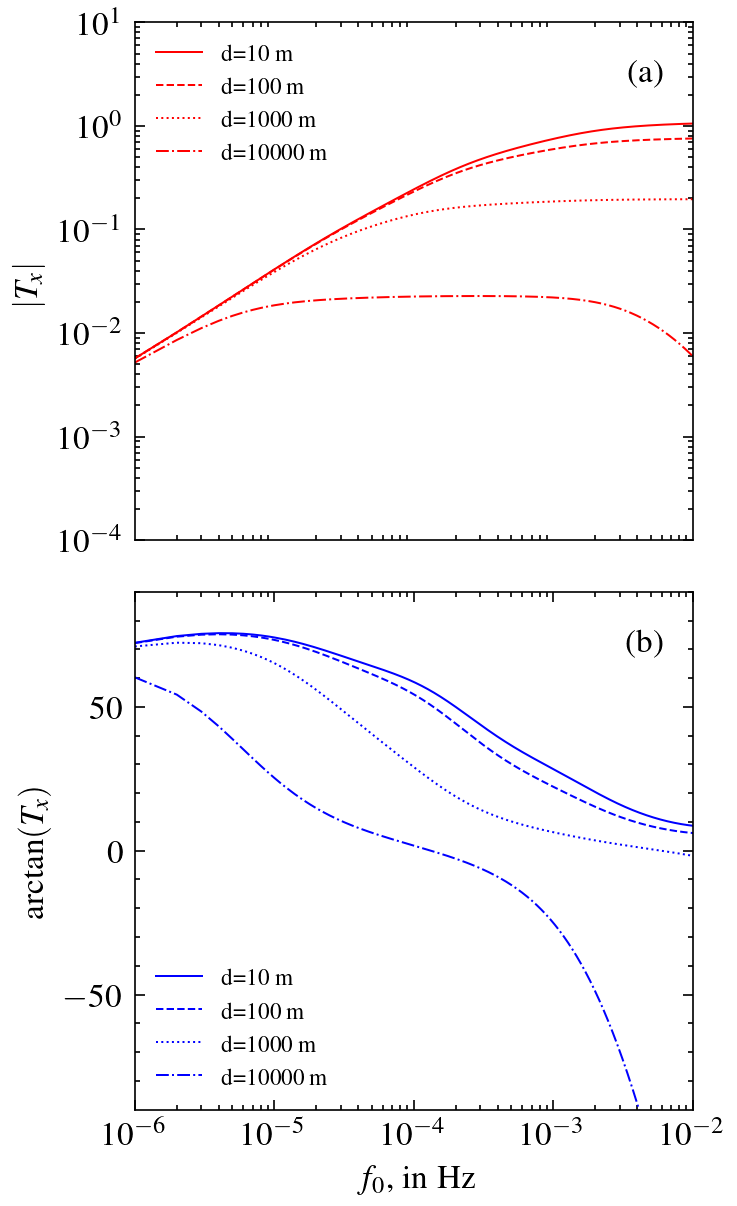

In [4]:
fig = plt.figure(dpi=240, figsize=(3,6))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for i, d in enumerate([10, 100, 1000, 10000]):
    Tx = resp[i].get_TFs()
    ax0.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6, label=r"d=%d m"%d)
    ax1.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6, label=r"d=%d m"%d)
ax0.text(0.95, 0.9, "(a)", ha="right", va="center", transform=ax0.transAxes)
ax0.set_ylabel(r"$|T_x|$")
ax0.set_xlim(1e-6, 1e-2)
ax0.set_ylim(1e-4, 1e1)
ax0.set_xticks([])
ax0.legend(loc=2, fontsize=7)
ax1.set_xlabel(r"$f_0$, in Hz")
ax1.set_ylabel(r"$\arctan(T_x)$")
ax1.set_xlim(1e-6, 1e-2)
ax1.set_ylim(-90, 90)
ax1.legend(loc=3, fontsize=7)
ax1.text(0.95, 0.9, "(b)", ha="right", va="center", transform=ax1.transAxes)
fig.subplots_adjust(hspace=0.1)

In [10]:
e = pd.DataFrame()
e["X"], e["dTime"] = [1], [0] # inputs is in mV/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 10000.
            },
            "elec_params":{
                "earth_model": "FT1",
                "ocean_depth": 4000,
                "ocean_resistivity": 0.3
            }
        }
    ],
    "cable_pot_plot_index": 0
}
Z0, Gma = [], []
D = range(1, 5001, 10)
for t in D:
    cable = RecursiveNamespace(**cab)
    cable.cable_sections[0].elec_params.ocean_depth = t
    txcable = Cable(cable, Efields, None, ["X"], "tmp/out/004/")
    Z0.append(txcable.tx_lines[0].Z0)
    Gma.append(txcable.tx_lines[0].gma)


2022-07-29 09:51:48.588 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.590 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.590 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.593 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 976b3976-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.594 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.597 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.598 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.599 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.602 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 976c8e84-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:48.691 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.693 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.694 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.694 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.697 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 977b2b9c-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.697 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.700 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.700 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.701 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:4

2022-07-29 09:51:48.783 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97884994-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.783 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.786 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.786 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.787 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.789 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 978939f8-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.789 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.791 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.792 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:48.872 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.875 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9796535e-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.875 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.877 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.878 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.879 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.881 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9797419c-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.881 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.884 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

2022-07-29 09:51:48.964 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.964 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.967 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97a45ca6-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.967 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:48.969 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:48.970 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:48.971 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:48.973 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97a54d8c-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:48.973 | INFO     | gic.model.cables:calc_trasmission_line_parameters:

2022-07-29 09:51:49.056 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.056 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.057 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.059 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97b27660-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.059 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.062 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.063 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.063 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.065 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97b3662e-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:49.146 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.148 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.149 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.149 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.152 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97c09484-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.152 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.154 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.155 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.156 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:4

2022-07-29 09:51:49.238 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97cdbe16-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.238 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.241 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.241 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.242 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.244 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97ceb276-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.244 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.247 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.247 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:49.328 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.330 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97dbcd76-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.330 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.333 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.334 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.334 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.336 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97dcbee8-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.337 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.339 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

2022-07-29 09:51:49.420 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.420 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.423 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97e9efbe-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.423 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.425 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.426 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.427 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.429 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97eae1c6-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.429 | INFO     | gic.model.cables:calc_trasmission_line_parameters:

2022-07-29 09:51:49.512 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.513 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.513 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.516 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97f81c06-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.516 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.518 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.519 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.519 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.522 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 97f90f58-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:49.603 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.605 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.606 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.606 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.608 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98064092-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.609 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.611 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.612 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.612 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:4

2022-07-29 09:51:49.695 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98136f42-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.695 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.697 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.698 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.699 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.701 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98145f1a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.701 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.703 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.704 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:49.785 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.787 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9821858c-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.787 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.790 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.790 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.791 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.793 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 982277bc-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.793 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.796 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

2022-07-29 09:51:49.877 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.877 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.879 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 982fa040-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.880 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.882 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.883 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.883 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.885 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 983090e0-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.886 | INFO     | gic.model.cables:calc_trasmission_line_parameters:

2022-07-29 09:51:49.968 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.969 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.970 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.972 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 983dc3be-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:49.972 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:49.975 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:49.976 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:49.976 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:49.978 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 983eb990-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:50.059 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.061 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.062 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.063 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.065 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 984bec78-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.065 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.067 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.068 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.069 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:5

2022-07-29 09:51:50.151 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98591542-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.151 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.154 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.155 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.155 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.157 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 985a07c2-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.158 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.160 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.161 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:50.241 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.244 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98673a14-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.244 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.246 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.247 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.248 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.250 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98682d7a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.250 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.253 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

2022-07-29 09:51:50.334 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.334 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.336 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9875587e-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.337 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.339 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.340 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.340 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.342 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 987647de-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.343 | INFO     | gic.model.cables:calc_trasmission_line_parameters:

2022-07-29 09:51:50.421 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.422 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.422 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.424 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9882c3e2-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.424 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.427 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.427 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.428 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.430 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9883a366-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:50.505 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.507 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.508 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.508 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.510 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 988ff30a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.511 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.513 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.514 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.514 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:5

2022-07-29 09:51:50.591 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 989c3bb0-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.591 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.593 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.594 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.594 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.597 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 989d1a3a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.597 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.599 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.600 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:50.674 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.677 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98a94f08-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.677 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.679 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.680 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.680 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.682 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98aa3116-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.683 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.685 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

2022-07-29 09:51:50.761 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.761 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.763 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98b67d18-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.763 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.765 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.766 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.767 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.769 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98b75dbe-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.769 | INFO     | gic.model.cables:calc_trasmission_line_parameters:

2022-07-29 09:51:50.846 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.847 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.847 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.849 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98c3ae8e-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.850 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.852 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.853 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.853 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.855 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98c48fac-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:50.930 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.932 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.933 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.933 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:50.936 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98d0d2e4-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:50.936 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:50.938 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:50.939 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:50.939 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:5

2022-07-29 09:51:51.015 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98dd055a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.016 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.018 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.019 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.019 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.021 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98dde826-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.022 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.024 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.025 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:51.100 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.102 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98ea3dc4-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.103 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.105 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.105 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.106 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.108 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98eb1e24-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.108 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.110 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

2022-07-29 09:51:51.186 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.186 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.188 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98f75a40-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.188 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.191 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.191 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.192 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.194 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 98f83a5a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.194 | INFO     | gic.model.cables:calc_trasmission_line_parameters:

2022-07-29 09:51:51.271 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.272 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.272 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.274 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 99048594-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.275 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.277 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.277 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.278 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.280 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 99055e06-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(F

2022-07-29 09:51:51.355 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.358 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.358 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.359 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.361 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 9911b3d6-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.361 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.363 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.364 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.364 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:5

2022-07-29 09:51:51.441 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 991df664-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.441 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.444 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.444 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.445 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.447 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 991ed4f8-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.447 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.449 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.450 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length


2022-07-29 09:51:51.525 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.527 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 992b080e-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.527 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.529 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-07-29 09:51:51.530 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-07-29 09:51:51.530 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-07-29 09:51:51.532 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 992be71a-0f45-11ed-9e3c-f30db1b64f8e FT1->OM(FT1)
2022-07-29 09:51:51.533 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-07-29 09:51:51.535 | WARNING  | gic.model.cables:setup:398 - Into cable setup sect

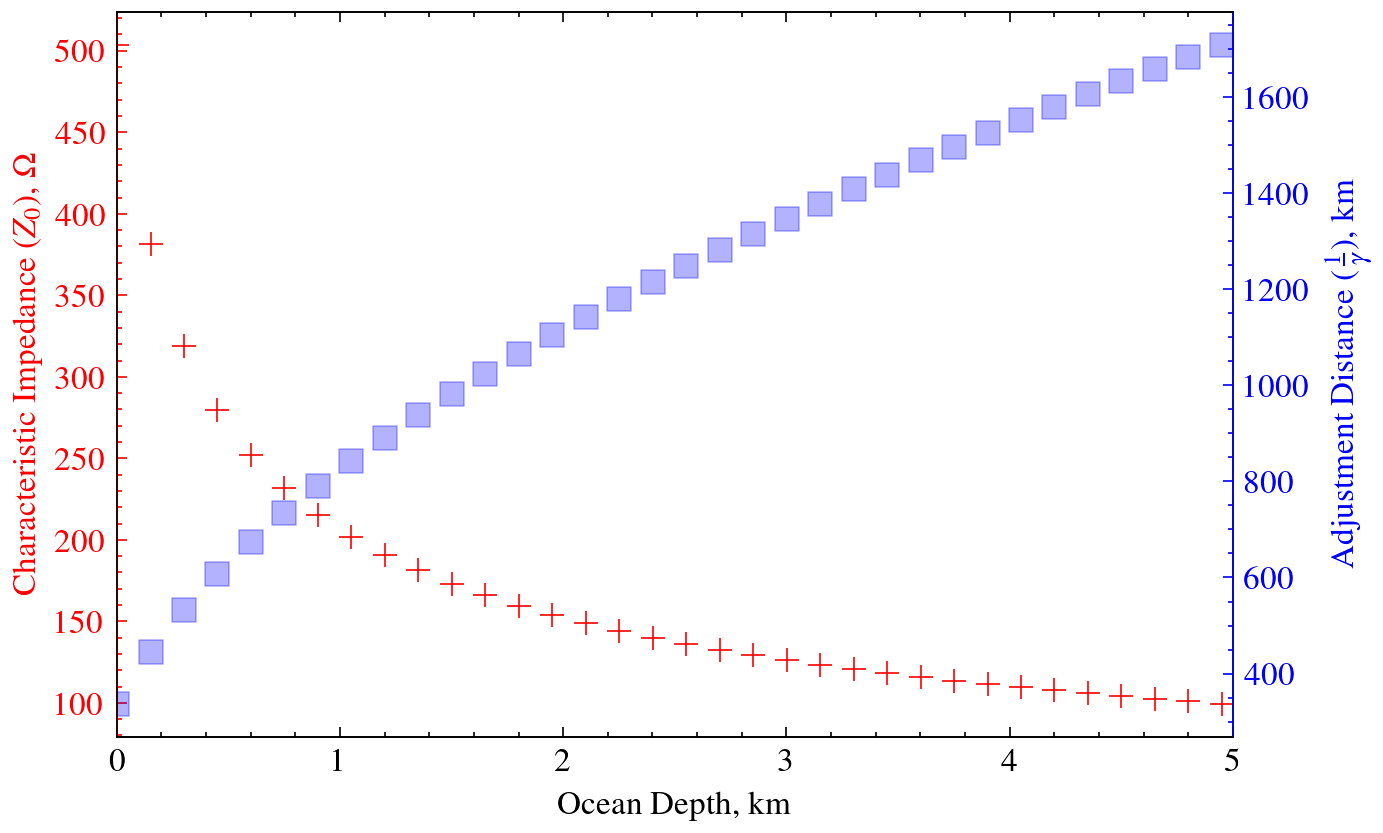

In [18]:
fig = plt.figure(dpi=240, figsize=(6,4))
ax0 = fig.add_subplot(111)
ax0.set_xlabel("Ocean Depth, km")
ax0.set_ylabel(r"Characteristic Impedance ($Z_0$), $\Omega$", color="r")
ax0.spines["left"].set_color("r")
ax0.set_xlim(0,5)
ax0.tick_params(axis="y", colors="r", which="both")
ax0.scatter(np.array(D[::15])/1e3, Z0[::15], marker="+", color="r", ls="None", s=50, linewidth=0.5, zorder=2)
ax0 = ax0.twinx()
ax0.set_ylabel(r"Adjustment Distance ($\frac{1}{\gamma}$), km", color="b")
ax0.scatter(np.array(D[::15])/1e3, 1e-3/np.array(Gma[::15]), marker="s", color="b", 
            ls="None", s=50, linewidth=0.5, zorder=2, alpha=0.3)
ax0.set_xlim(0,5)
ax0.spines["right"].set_color("b")
ax0.tick_params(axis="y", colors="b", which="both")